In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn as sea

plt.style.use("seaborn")
%matplotlib inline

In [4]:
#Read the csv file

data = pd.read_csv("survey_results_public.csv")
data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [ ]:
#Percentage of people who code as a hobby

hobby = data['Hobbyist']
print(hobby.isnull().sum())
hobby.value_counts()

45


Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [ ]:
hobby = hobby.dropna()

In [ ]:
yes_perc = 50388 * 100/len(hobby)
no_perc = 100 - yes_perc
yes_perc

78.22280178837556

In [ ]:
#Distribution based on frequency of payment

CompFreq = data['CompFreq']
CompFreq = CompFreq.dropna()
CompFreq.value_counts()

Yearly     19818
Monthly    18899
Weekly      1352
Name: CompFreq, dtype: int64

In [ ]:
labels = ['Yearly','Monthly','Weekly']
myexplode = [0.02,0.02,0.02]
plt.title("Frequency of compensation")
plot_CompFreq = plt.pie(CompFreq.value_counts(),labels=labels,explode = myexplode,startangle=30,  autopct='%1.1f%%')

In [ ]:
EdLevel = data['EdLevel']
EdLevel = EdLevel.dropna()
EdLevel_freq = EdLevel.value_counts()
print(EdLevel_freq)
New_EdLevel = ['Bachelors','Masters','Some university study without earning a degree','Secondary school','Associate degree','Other doctoral degree','Primary/elementary school','Professional degree',' Never completed any formal education ']
sns.barplot(y=New_EdLevel,x=EdLevel_freq.values,palette='Oranges_d')

In [ ]:
#Distribution based on UG subject

ug_major = data['UndergradMajor']
ug_major = ug_major.dropna()
freq = ug_major.value_counts()
freq

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

In [ ]:
new_ug_major = ['Computer Science','Other engineering','Information systems','Natural Science','Mathematics','Web Development','Business','Humanities','Social Science','Fine Arts','Not Declared','Health Science ']
plt.figure(figsize=(15,8))
plt.title("Undergraduate major")
plt.xlabel("Count")
plot_new_ug_major = sns.barplot(y=new_ug_major,x=freq.values,palette = 'magma_d')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
'''
A function to seperate out multiple values seperated by ';'
m = lenght, series = the series to parse
Returns a dictionary
'''

def parser(m, series):
    series_dict =  {}
    for i in range(0, m):
        try:
            lang_coll = str(series[i]).split(';')
            for sp_lang in lang_coll:
                if sp_lang in series_dict:
                    series_dict.update({sp_lang : 1+series_dict.get(sp_lang)})
                else:
                    series_dict.update({sp_lang :1})
        except:
            pass

    return series_dict


In [ ]:
#Distribution of database worked with

Database_workedwith = data['DatabaseWorkedWith']
Database_workedwith = Database_workedwith.dropna()
Database_workedwith = Database_workedwith.values
New_Database_workedwith = parser(len(data),Database_workedwith)
New_Database_workedwith

{'Elasticsearch': 6817,
 'Microsoft SQL Server': 16336,
 'Oracle': 8155,
 'MySQL': 27559,
 'PostgreSQL': 17892,
 'Redis': 9056,
 'SQLite': 15434,
 'MariaDB': 8312,
 'Firebase': 7128,
 'MongoDB': 13086,
 'IBM DB2': 1421,
 'DynamoDB': 3497,
 'Cassandra': 1654,
 'Couchbase': 937}

In [ ]:
#Distribution of database willing to work with in comming years

New_Database_workedwith_dataframe = pd.DataFrame(New_Database_workedwith,index=['count'])
New_Database_workedwith_dataframe

,Elasticsearch,Microsoft SQL Server,Oracle,MySQL,PostgreSQL,Redis,SQLite,MariaDB,Firebase,MongoDB,IBM DB2,DynamoDB,Cassandra,Couchbase
count,6817,16336,8155,27559,17892,9056,15434,8312,7128,13086,1421,3497,1654,937


In [ ]:
Database_Desire = data['DatabaseDesireNextYear']
Database_Desire = Database_Desire.dropna()
Database_Desire = Database_Desire.values
New_Database_Desire = parser(len(data),Database_Desire)
New_Database_Desire_dataframe = pd.DataFrame(New_Database_Desire,index=['count'])
New_Database_Desire_dataframe

,Microsoft SQL Server,MySQL,PostgreSQL,MongoDB,Firebase,Cassandra,Elasticsearch,MariaDB,Redis,SQLite,Oracle,DynamoDB,Couchbase,IBM DB2
count,9876,15734,17681,16024,8600,4227,10269,6126,11977,10909,4794,4773,1678,935


In [ ]:
plt.figure(figsize=(22,10))
plt.subplot(121)
sns.barplot(data=New_Database_workedwith_dataframe,orient ='h')
plt.title("Database worked with")
plt.xlabel("Count")
plt.subplot(122)
plt.title("Database Desire")
plt.xlabel("Count")
sns.barplot(data=New_Database_Desire_dataframe,orient='h')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Database Desire'}, xlabel='Count'>

In [ ]:
#Distribution of platform worked with

Platform_Worked_With = data['PlatformWorkedWith']
Platform_Worked_With = Platform_Worked_With.dropna()
Platform_Worked_With = Platform_Worked_With.values
New_Platform_Worked_With = parser(len(data),Platform_Worked_With)
New_Platform_Worked_With = pd.DataFrame(New_Platform_Worked_With,index=['count'])
New_Platform_Worked_With

,Windows,iOS,AWS,Docker,Linux,MacOS,Android,WordPress,Raspberry Pi,Heroku,Google Cloud Platform,Kubernetes,Arduino,Slack Apps and Integrations,Microsoft Azure,IBM Cloud or Watson
count,28595,6562,14389,18851,29600,12898,14101,7654,8010,5974,7569,6178,5712,3922,7830,876


In [ ]:
#Distribution of platform willing to work in comming years

Platform_Desire = data['PlatformDesireNextYear']
Platform_Desire = Platform_Desire.dropna()
Platform_Desire = Platform_Desire.values
New_Platform_Desire = parser(len(data),Platform_Desire)
New_Platform_Desire = pd.DataFrame(New_Platform_Desire,index=['count'])
New_Platform_Desire

,Android,iOS,Kubernetes,Microsoft Azure,Windows,Linux,MacOS,Docker,Google Cloud Platform,Heroku,Slack Apps and Integrations,Raspberry Pi,AWS,WordPress,Arduino,IBM Cloud or Watson
count,15085,9357,14009,9816,17816,27475,11793,23458,11648,5071,3791,11614,18381,3847,6895,1813


In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(121)
sns.barplot(data=New_Platform_Worked_With,orient ='h')
plt.title("Platform worked with")
plt.xlabel("Count")
plt.subplot(122)
plt.title("Platform Desire")
plt.xlabel("Count")
sns.barplot(data=New_Platform_Desire,orient='h')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Platform Desire'}, xlabel='Count'>

In [ ]:
Webframe_Worked_With = data['WebframeWorkedWith']
Webframe_Worked_With = Webframe_Worked_With.dropna()
Webframe_Worked_With = Webframe_Worked_With.values
New_Webframe_Worked_With = parser(len(data),Webframe_Worked_With)
New_Webframe_Worked_With = pd.DataFrame(New_Webframe_Worked_With,index=['count'])
Webframe_Desire = data['WebframeDesireNextYear']
Webframe_Desire = Webframe_Desire.dropna()
Webframe_Desire = Webframe_Desire.values
New_Webframe_Desire = parser(len(data),Webframe_Desire)
New_Webframe_Desire = pd.DataFrame(New_Webframe_Desire,index=['count'])


In [ ]:
plt.figure(figsize=(22,10))
plt.subplot(121)
sns.barplot(data=New_Webframe_Worked_With,orient ='h', palette = 'rocket')
plt.title("Webframe worked with")
plt.xlabel("Count")
plt.subplot(122)
plt.title("Webframe desired to work with")
plt.xlabel("Count")
sns.barplot(data=New_Webframe_Desire,orient='h', palette = 'Reds_d', alpha = 0.9)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Webframe desired to work with'}, xlabel='Count'>

In [ ]:
#Distribution of the different dev branches

branch_freq = data['MainBranch'].value_counts()
# print(branch_freq.keys()
labels = ['Dev by profession', 'Student', 'As part of Work', 'Hobby', 'No more a professional']
branch_df = pd.DataFrame({'Branch' : labels, 'Count' : branch_freq.values})
    
sea.barplot(y = 'Branch', x = 'Count', data= branch_df, orient='h', palette='Greens_d', alpha = 0.8)
    
plt.title("Motivation Chart")
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
#Distribution based on country

country_freq = data['Country'].value_counts().head(20)
country_df = pd.DataFrame({'Country': country_freq.keys(), 'Count': country_freq.values})
plt.title("Country wise distribution")
sea.barplot(y='Country', x ='Count', data = country_df, orient='h', palette="rocket_d")
# plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Country wise distribution'}, xlabel='Count', ylabel='Country'>

In [ ]:
#Distribution based on age

age = data['Age']
age = age.dropna()
    
sea.histplot(x = age, bins = 15, shrink=0.8, binwidth=1, discrete=True, color = '#9575cd')
plt.title("Age wise distribution")
plt.xlim(0,100)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.0, 100.0)

In [ ]:
#Distribution based on salary earned(in yearly basis(per $1000))

salary_df = pd.DataFrame({'mode':data['CompFreq'],'Salary' : data['ConvertedComp']})
salary_df = salary_df.dropna().reset_index()
for i in range(0, len(salary_df)):
    if salary_df['mode'][i] == 'Monthly':
        salary_df['Salary'][i] *= 12
    elif salary_df['mode'][i] == 'Weekly':
        salary_df['Salary'][i] *= 52
    
salary_df['Salary'] /= 1000
salary_df = salary_df[salary_df['Salary'] >= 20]
#print(salary_df['salary'])
plt.xlim(0, 1500)
sea.histplot(x = 'Salary', data = salary_df, bins = 4000, color = '#80cbc4')
plt.title("Salary(per $1000)")

<ipython-input-38-1588caea20aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df['Salary'][i] *= 12
<ipython-input-38-1588caea20aa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df['Salary'][i] *= 52


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Salary(per $1000)')

In [10]:
def parser(m, series):
    series_dict =  {}
    for i in range(0, m):
        try:
            lang_coll = str(series[i]).split(';')
            for sp_lang in lang_coll:
                if sp_lang in series_dict:
                    series_dict.update({sp_lang : 1+series_dict.get(sp_lang)})
                else:
                    series_dict.update({sp_lang :1})
        except:
            pass

    return series_dict

In [ ]:
#Distribution of language worked with and willing to work in the next years

m = len(data)
lang = data['LanguageWorkedWith']
lang = lang.dropna()
lang_dict = parser(m, lang)
    
lang_df = pd.DataFrame({'Programming Language' : lang_dict.keys(), 'Count' : lang_dict.values()})\
        .sort_values(by='Count', ascending=False).head(20)
    
lang_future_dict = parser(m, data['LanguageDesireNextYear'].dropna())
    
lang_future_df = pd.DataFrame({'Programming Language' : lang_future_dict.keys(),
                                   'Count' : lang_future_dict.values()}).sort_values(by = 'Count', ascending=False).head(20)
    
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Language worked with")
sea.barplot(y = 'Programming Language', x= 'Count', data = lang_df, orient='h', palette='Greens_r')
    
plt.subplot(1,2,2)
plt.title("Language desired to work with")
sea.barplot(y = lang_future_df['Programming Language'], x= lang_future_df['Count'],
                orient='h', palette='Blues_r')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Language desired to work with'}, xlabel='Count', ylabel='Programming Language'>

In [ ]:
#Distribution of types of developers

dev_type = data['DevType'].dropna()
dev_dict = parser(len(data), dev_type)
dev_df = pd.DataFrame({'Developer Type' : dev_dict.keys(), 'Count' : dev_dict.values()}).sort_values(by='Count',ascending=False)\
        .head(20)
plt.title("Distribution of types of developers (top 20)")

sea.barplot(x= dev_df['Count'], y=dev_df['Developer Type'], orient='h', palette='Oranges_d')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:title={'center':'Distribution of types of developers (top 20)'}, xlabel='Count', ylabel='Developer Type'>

Text(0.5, 1.0, 'Comparison of working hours(per week) in different countries')

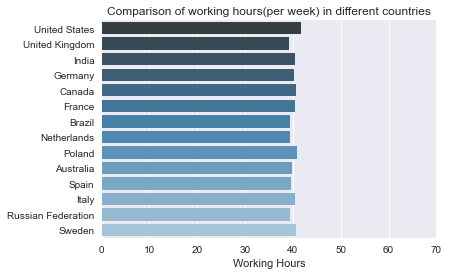

In [5]:
#Working hours per week

country_work_df = pd.DataFrame({'Country': data['Country'], 'Working Hours': data['WorkWeekHrs']}).dropna() \
        .reset_index().drop(columns=['index'])
country_set = ['United States', 'United Kingdom', 'India', 'Germany', 'Canada','France', 'Brazil', 'Netherlands',
                   'Poland', 'Australia', 'Spain', 'Italy', 'Russian Federation','Sweden']
    
work_set = [0] * len(country_set)
    
for j in range(0, len(country_set)):
        work_set[j] = country_work_df[country_work_df['Country'] == country_set[j]]['Working Hours'].mean()
    
sea.barplot(y =country_set, x = work_set, orient='h', palette='Blues_r_d')
plt.xlim(0, 70)
plt.xlabel('Working Hours')
plt.title("Comparison of working hours(per week) in different countries")

Text(0.5, 1.0, 'Comaprison of Working Hours with Age')

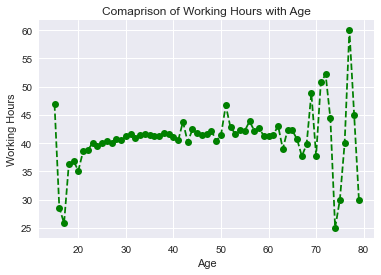

In [6]:
#
work_age_df = pd.DataFrame({'Age':data['Age'], 'Working Hours':data['WorkWeekHrs']}).dropna()
age_set = np.arange(15,80)
hours_set = [0] * len(age_set)
    
for j in range(0, len(hours_set)):
    hours_set[j] = work_age_df[work_age_df['Age'] == age_set[j]]['Working Hours'].mean()
    
plt.plot(age_set, hours_set, '--g', marker = 'o')
plt.xlabel("Age")
plt.ylabel("Working Hours")
plt.title("Comaprison of Working Hours with Age")

(-1.1635359669916865,
 1.1554035386176063,
 -1.1858903449379117,
 1.1599960328194905)

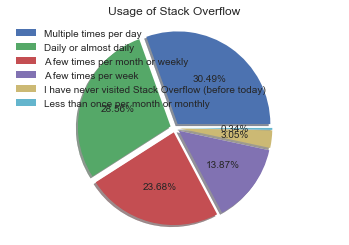

In [7]:
#Stack Overflow information

so_freq = data['SOVisitFreq'].dropna()
response_set = so_freq.unique()
plt.pie(so_freq.value_counts(), shadow = True, explode=[0.05]*6, autopct='%1.2f%%')
plt.title("Usage of Stack Overflow")
plt.legend(response_set, loc= 'upper left')
plt.axis("equal")

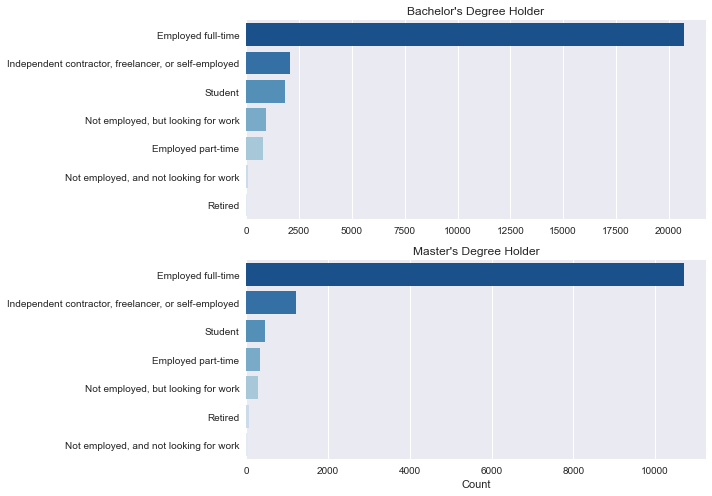

In [8]:
#Educational qualification

emp_df = pd.DataFrame({'Ed': data['EdLevel'], 'Emp' : data['Employment']}).dropna()
tar1 = 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
tar2 = 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
    
emp_single = emp_df[emp_df['Ed'] == tar1]['Emp']
emp_single_freq = emp_single.value_counts()
    
emp_masters = emp_df[emp_df['Ed'] == tar2]['Emp']
emp_masters_freq = emp_masters.value_counts()
    
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.title('Bachelor\'s Degree Holder')
sea.barplot(y = emp_single_freq.keys(), x = emp_single_freq.values, orient='h', palette='Blues_r')
    
plt.subplot(2,1,2)
plt.title('Master\'s Degree Holder')
sea.barplot(y=emp_masters_freq.keys(), x = emp_masters_freq.values, orient='h', palette='Blues_r')
    
plt.xlabel('Count')
plt.tight_layout()

0                     Curious about other opportunities
1                 Wanting to work with new technologies
2                                   Better compensation
3                    Growth or leadership opportunities
4                        Trouble with my direct manager
5                 Trouble with leadership at my company
6                              Better work/life balance
7                                   Looking to relocate
8           Having a bad day (or week or month) at work
9     Wanting to share accomplishments with a wider ...
10                            Trouble with my teammates
11                                         Just because
Name: Reason, dtype: object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Curious about other opportunities'),
  Text(0, 1, 'Wanting to work with new technologies'),
  Text(0, 2, 'Better compensation'),
  Text(0, 3, 'Growth or leadership opportunities'),
  Text(0, 4, 'Trouble with my direct manager'),
  Text(0, 5, 'Trouble with leadership at my company'),
  Text(0, 6, 'Better work/life balance'),
  Text(0, 7, 'Looking to relocate'),
  Text(0, 8, 'Having a bad day (or week or month) at work'),
  Text(0, 9, 'Wanting to share accomplishments with a wider network'),
  Text(0, 10, 'Trouble with my teammates'),
  Text(0, 11, 'Just because')])

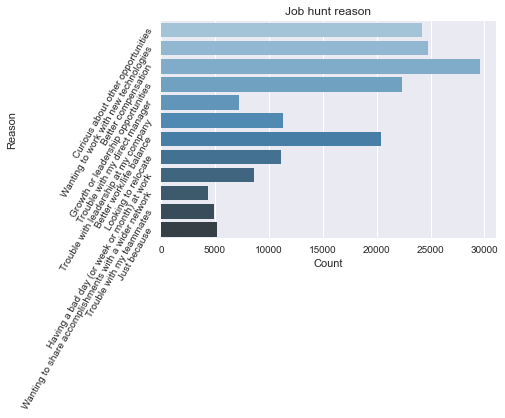

In [11]:
#Factors for a good job

job_hunt = data['NEWJobHunt'].dropna()
jon_hunt_dict = parser(len(data), job_hunt)
job_hunt_df = pd.DataFrame({'Reason' : jon_hunt_dict.keys(), 'Count' : jon_hunt_dict.values()})
print(job_hunt_df['Reason'])
reason = ['']
sea.barplot(y = 'Reason', x = 'Count', data = job_hunt_df, palette='Blues_d')
plt.title("Job hunt reason")
plt.yticks(rotation = 60)

0    Languages, frameworks, and other technologies ...
4                Office environment or company culture
3                     Flex time or a flexible schedule
2           Opportunities for professional development
1                                  Remote work options
7    How widely used or impactful my work output wo...
Name: Need, dtype: object


Text(0.5, 1.0, 'Job Factors')

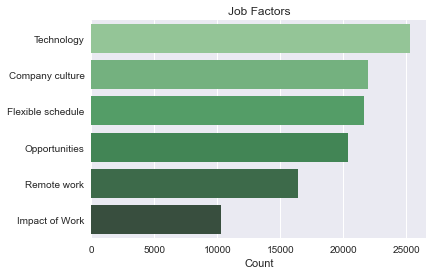

In [12]:
job_fact_dict = parser(len(data), data['JobFactors'].dropna())
job_fact_df = pd.DataFrame({'Need' : job_fact_dict.keys(), 'Count' : job_fact_dict.values()}).sort_values(by = 'Count', ascending=False)\
        .head(6)
print(job_fact_df['Need'])
    
labels = ['Technology', 'Company culture', 'Flexible schedule', 'Opportunities', 'Remote work', 'Impact of Work']
sea.barplot(y = labels, x = job_fact_df['Count'],orient= 'h', palette='Greens_d')
plt.title('Job Factors')

In [ ]:
survey = pd.read_csv("survey_results_public.csv")

In [ ]:
gender_survey = survey[["Gender"]]
gender_survey

,Gender
0,Man
1,NaN
2,NaN
3,Man
4,Man
...,...
64456,NaN
64457,NaN
64458,NaN
64459,NaN


In [ ]:
#Distribution based on gender

gender_survey.Gender.unique()
gender_survey.value_counts()

NameError: name 'gender_survey' is not defined

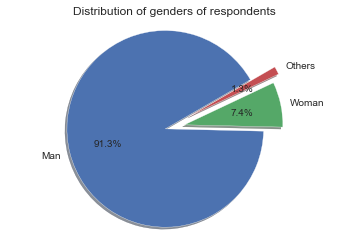

In [ ]:
gender_counts = {"Man":40812, "Woman": 3307, "Others":585 }


labels = list(gender_counts.keys())
sizes = list(gender_counts.values())
explode = [0,0.2,0.28]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  
plt.title("Distribution of genders of respondents")
plt.show()

<ipython-input-112-3d48ff4b6bf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os.dropna(inplace=True)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


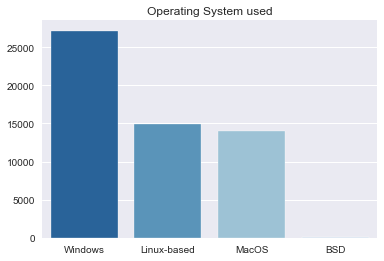

In [ ]:
#Distribution based on OS used

os = survey[["OpSys"]]
os.dropna(inplace=True)
osvalues = (os.value_counts()).to_dict()
osx = ["Windows", "Linux-based", "MacOS", 'BSD']
osy = list(osvalues.values())
plt.title("Operating System used")
sns.barplot(osx,osy, palette="Blues_r")
plt.show()

In [ ]:
data = pd.read_csv("survey_results_public.csv")
salary_df = pd.DataFrame({'mode':data['CompFreq'],'Salary' : data['ConvertedComp']})
salary_df = salary_df.dropna().reset_index()

for i in range(0, len(salary_df)):
    if salary_df['mode'][i] == 'Monthly':
            salary_df['Salary'][i] *= 12
    elif salary_df['mode'][i] == 'Weekly':
            salary_df['Salary'][i] *= 52

<ipython-input-56-748a47575945>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df['Salary'][i] *= 12
<ipython-input-56-748a47575945>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df['Salary'][i] *= 52


In [ ]:
prosalary = survey[["YearsCodePro","CompFreq", "ConvertedComp"]]
prosalary = prosalary[["YearsCodePro","CompFreq", "ConvertedComp"]].dropna(subset=["CompFreq", "ConvertedComp"])
prosalary = prosalary.reset_index()
prosalary["ConvertedComp"] = salary_df["Salary"]
prosalary = prosalary.drop(["CompFreq","index"], axis=1)
prosalary = prosalary[["YearsCodePro", "ConvertedComp"]]


In [ ]:
proyears = list(prosalary.YearsCodePro.unique())

In [ ]:
proyears.sort()

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
for i in range(len(proyears)-2):
    proyears[i]=int(proyears[i])

ValueError: invalid literal for int() with base 10: 'Less than 1 year'

In [ ]:
prosalarymean = list()
for i in proyears:
    prosalarymean.append(prosalary[prosalary["YearsCodePro"]==str(i)]["ConvertedComp"].mean())

([<matplotlib.axis.XTick at 0x24191829cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

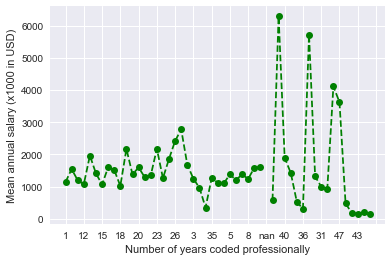

In [ ]:
proyear = proyears[0:len(proyears)-2]
prosalarymea = prosalarymean[0:len(prosalarymean)-2]
prosalarymea = [x/1000 for x in prosalarymea]
plt.plot(proyear , prosalarymea, '--g', marker = 'o')
plt.xlabel("Number of years coded professionally")
plt.ylabel("Mean annual salary (x1000 in USD)")
plt.xticks(np.arange(0,52,3))

In [ ]:
#Distribution based on how much are the developers willing to learn new language or a framework

newlearn = survey[["NEWLearn"]]
newlearn.dropna(inplace=True)
sns.set_style('darkgrid')
newx = ['Every few months','Once a year', 'Once every few years','Once a decade']
newy = newlearn.value_counts().to_list()
sns.barplot(newx,newy,palette="rocket", alpha = 0.8)
plt.title("Frequency of how often a respondent learns a new language or framework")
plt.show()

NameError: name 'survey' is not defined

NameError: name 'prosalary' is not defined